Unzip the dataset folder, it has to be updated manually everytime you change the dataset

In [ ]:
!unzip new_screenshot.zip

FileNotFoundError: ignored

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Use the image data generator for feeding images, make sure the alphebetical order to avoid clashes

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="new_screenshot/training",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="new_screenshot/validation", target_size=(224,224))


Found 103 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


Build the VGG16 model manually putting the layers

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=4096,activation="relu"))

model.add(Dense(units=2, activation="softmax"))

from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

Make sure you have steps per epoch * epoch data in training if not it will run out of data

In [ ]:
hist = model.fit(traindata,validation_data=testdata, epochs=10, steps_per_epoch=int(103/32), validation_steps=int(32/32))

model.save('vgg16_2.h5')

Epoch 1/10
3/3 [==============================] - 173s 49s/step - loss: 642.4160 - accuracy: 0.4005 - val_loss: 1.3296 - val_accuracy: 0.5938
Epoch 2/10
3/3 [==============================] - 165s 51s/step - loss: 1.1772 - accuracy: 0.6340 - val_loss: 1.2848 - val_accuracy: 0.4062
Epoch 3/10
3/3 [==============================] - 161s 72s/step - loss: 0.8740 - accuracy: 0.6679 - val_loss: 1.3708 - val_accuracy: 0.5938
Epoch 4/10
3/3 [==============================] - 165s 74s/step - loss: 1.0337 - accuracy: 0.5393 - val_loss: 2.9040 - val_accuracy: 0.4062
Epoch 5/10
3/3 [==============================] - 160s 48s/step - loss: 1.4848 - accuracy: 0.5512 - val_loss: 4.2585 - val_accuracy: 0.4062
Epoch 6/10
3/3 [==============================] - 206s 71s/step - loss: 1.8730 - accuracy: 0.6133 - val_loss: 0.8520 - val_accuracy: 0.4062
Epoch 7/10
3/3 [==============================] - 157s 48s/step - loss: 0.6754 - accuracy: 0.5424 - val_loss: 0.6717 - val_accuracy: 0.6562
Epoch 8/10
3/3 [==

In [ ]:
hist.history

{'accuracy': [0.4084506928920746,
  0.6478873491287231,
  0.6197183132171631,
  0.5492957830429077,
  0.5633803009986877,
  0.625,
  0.49295774102211,
  0.4375,
  0.591549277305603,
  0.591549277305603],
 'loss': [673.0884399414062,
  0.9889189004898071,
  1.1234205961227417,
  0.7742535471916199,
  1.281001091003418,
  1.4076628684997559,
  0.6817120313644409,
  2.03822922706604,
  0.702899158000946,
  0.6773825883865356],
 'val_accuracy': [0.59375,
  0.40625,
  0.59375,
  0.40625,
  0.40625,
  0.40625,
  0.65625,
  0.40625,
  0.40625,
  0.40625],
 'val_loss': [1.3296408653259277,
  1.2847747802734375,
  1.3707776069641113,
  2.9039809703826904,
  4.2585248947143555,
  0.8520197868347168,
  0.6717345714569092,
  0.738304615020752,
  0.8261016607284546,
  0.7043707966804504]}

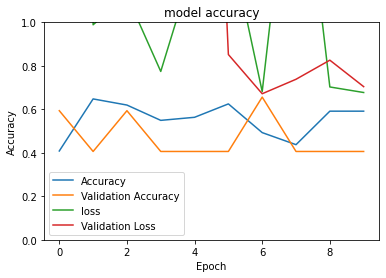

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.ylim([0, 1])
plt.show()

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
saved_model = load_model("vgg16_2.h5")

Use the loaded model to check if its being labelled as normal or abnormal

In [ ]:
img = image.load_img("fraud.7.jpg",target_size=(224,224))
img = np.asarray(img)
img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("non fraud")
else:
    print('fraud')


[[0.51521575 0.48478428]]
non fraud


In [ ]:
img = image.load_img("anonfraud.13.png",target_size=(224,224))
img = np.asarray(img)
#plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)
print(output)

if output[0][0] > output[0][1]:
    print("non fraud")
else:
    print('fraud')

[[0.52112794 0.47887203]]
non fraud
